# Prophet


https://zzsza.github.io/data/2019/02/06/prophet/

https://facebook.github.io/prophet/docs/non-daily_data.html

In [1]:
import pystan

In [2]:
from fbprophet import Prophet

In [180]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn # 인공 신경망 모델들 모아놓은 모듈
import torch.nn.functional as F #그중 자주 쓰이는것들을 F로
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import os
from glob import glob
import sys


if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
#DEVICE = torch.device('cpu')
print('Using Pytorch version : ',torch.__version__,' Device : ',DEVICE)

Using Pytorch version :  1.10.2  Device :  cuda


In [181]:
from tqdm import tqdm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [182]:
train_data = pd.read_csv("data/train_data.csv")
sample_submission = pd.read_csv("data/sample_submission.csv")

In [183]:
train_data2 = pd.read_csv("data/train_data.csv")
train_data2 = train_data2[train_data2['TurbID']==21]


In [184]:
train_data2[train_data2['Day']==1].shape

(144, 13)

In [185]:
# train_data의 결측값 확인
train_data.isnull().sum()

TurbID         0
Day            0
Tmstamp        0
Wspd       45587
Wdir       45587
Etmp       45587
Itmp       45587
Ndir       45587
Pab1       45587
Pab2       45587
Pab3       45587
Prtv       45587
Patv       45587
dtype: int64

In [186]:
# method : 결측값을 변경할 방식입니다. bfill로 할경우 결측값을 바로 아래 값과 동일하게 변경합니다.
# 결측값 처리
train_data = train_data.fillna(method = 'bfill')

print(train_data.isnull().sum())

TurbID     0
Day        0
Tmstamp    0
Wspd       0
Wdir       0
Etmp       0
Itmp       0
Ndir       0
Pab1       0
Pab2       0
Pab3       0
Prtv       0
Patv       0
dtype: int64


In [187]:
train_data = train_data[train_data['TurbID']==21]

In [188]:
train_data = train_data[['Day','Tmstamp','Wspd']]

In [189]:
train_data.head()

,Day,Tmstamp,Wspd
576000,1,00:00,5.46
576001,1,00:10,5.46
576002,1,00:20,5.11
576003,1,00:30,4.80
576004,1,00:40,4.74


In [190]:
train_data.describe()
# 최대값 25로 설정.

,Day,Wspd
count,28800.000000,28800.000000
mean,100.500000,5.274032
std,57.735308,3.430813
min,1.000000,0.000000
25%,50.750000,2.520000
50%,100.500000,4.650000
75%,150.250000,7.380000
max,200.000000,23.210000


In [191]:
train_data

,Day,Tmstamp,Wspd
576000,1,00:00,5.46
576001,1,00:10,5.46
576002,1,00:20,5.11
576003,1,00:30,4.80
576004,1,00:40,4.74
...,...,...,...
604795,200,23:10,4.05
604796,200,23:20,4.66
604797,200,23:30,4.26
604798,200,23:40,3.32


In [192]:
#train_data['cap'] = 25
#train_data['floor'] = 0

In [193]:
from datetime import datetime
from datetime import timedelta
dt = datetime(2020, 12, 31,23,50)
Days= []
for i in range(28800): 
    dt = dt + timedelta(minutes=10)
    dd=dt.strftime("%Y-%m-%d %H:%M")
    Days.append(dd)

In [194]:
train_data['Day']=Days

In [195]:
train_data.columns=['ds',"Tmstamp","y"]

In [196]:
train_data

,ds,Tmstamp,y
576000,2021-01-01 00:00,00:00,5.46
576001,2021-01-01 00:10,00:10,5.46
576002,2021-01-01 00:20,00:20,5.11
576003,2021-01-01 00:30,00:30,4.80
576004,2021-01-01 00:40,00:40,4.74
...,...,...,...
604795,2021-07-19 23:10,23:10,4.05
604796,2021-07-19 23:20,23:20,4.66
604797,2021-07-19 23:30,23:30,4.26
604798,2021-07-19 23:40,23:40,3.32


In [197]:
train_data=train_data.reset_index()

In [198]:
train_data.drop(['Tmstamp','index'],axis=1,inplace=True)

In [211]:
m = Prophet()

m.fit(train_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
C:\Users\USER\anaconda3\envs\local_torch\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


C:\Users\USER\anaconda3\envs\local_torch\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\USER\anaconda3\envs\local_torch\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


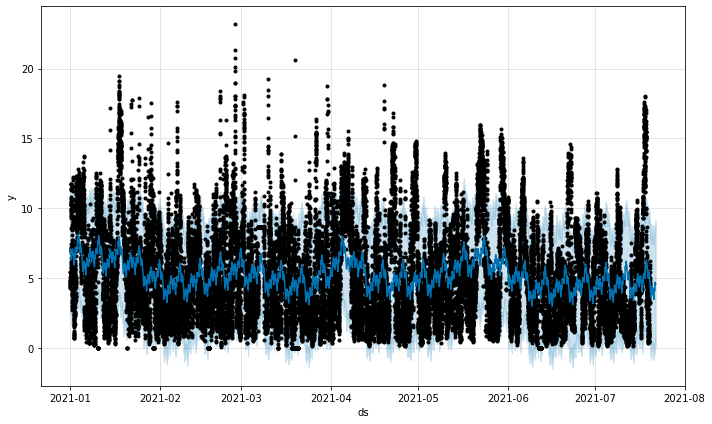

In [212]:
future = m.make_future_dataframe(periods=288, freq='10min')
#future['cap'] = 25
#future['floor'] = 0
fcst = m.predict(future)
m.plot(fcst);

In [213]:
fcst

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01 00:00:00,6.723752,3.136832,11.325173,6.723752,6.723752,0.375451,0.375451,0.375451,0.174983,0.174983,0.174983,0.200468,0.200468,0.200468,0.0,0.0,0.0,7.099203
1,2021-01-01 00:10:00,6.723584,3.087162,11.337773,6.723584,6.723584,0.376285,0.376285,0.376285,0.174674,0.174674,0.174674,0.201612,0.201612,0.201612,0.0,0.0,0.0,7.099869
2,2021-01-01 00:20:00,6.723416,3.234928,11.448614,6.723416,6.723416,0.375192,0.375192,0.375192,0.172506,0.172506,0.172506,0.202686,0.202686,0.202686,0.0,0.0,0.0,7.098608
3,2021-01-01 00:30:00,6.723248,2.880627,10.941954,6.723248,6.723248,0.371993,0.371993,0.371993,0.168303,0.168303,0.168303,0.203690,0.203690,0.203690,0.0,0.0,0.0,7.095242
4,2021-01-01 00:40:00,6.723081,2.854134,11.210283,6.723081,6.723081,0.366586,0.366586,0.366586,0.161960,0.161960,0.161960,0.204626,0.204626,0.204626,0.0,0.0,0.0,7.089667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29083,2021-07-21 23:10:00,4.847818,0.228317,8.875875,4.839421,4.854496,-0.290404,-0.290404,-0.290404,0.159316,0.159316,0.159316,-0.449720,-0.449720,-0.449720,0.0,0.0,0.0,4.557413
29084,2021-07-21 23:20:00,4.847912,0.694423,9.021249,4.839442,4.854644,-0.281094,-0.281094,-0.281094,0.163479,0.163479,0.163479,-0.444573,-0.444573,-0.444573,0.0,0.0,0.0,4.566818
29085,2021-07-21 23:30:00,4.848007,0.419713,8.565598,4.839462,4.855534,-0.271863,-0.271863,-0.271863,0.167546,0.167546,0.167546,-0.439408,-0.439408,-0.439408,0.0,0.0,0.0,4.576145
29086,2021-07-21 23:40:00,4.848102,0.480469,8.462466,4.839483,4.855689,-0.263143,-0.263143,-0.263143,0.171082,0.171082,0.171082,-0.434225,-0.434225,-0.434225,0.0,0.0,0.0,4.584959


In [228]:
train_data.iloc[:40,:]

,ds,y
0,2021-01-01 00:00,5.46
1,2021-01-01 00:10,5.46
2,2021-01-01 00:20,5.11
3,2021-01-01 00:30,4.80
4,2021-01-01 00:40,4.74
5,2021-01-01 00:50,4.55
6,2021-01-01 01:00,4.85
7,2021-01-01 01:10,4.85
8,2021-01-01 01:20,4.47
9,2021-01-01 01:30,4.30


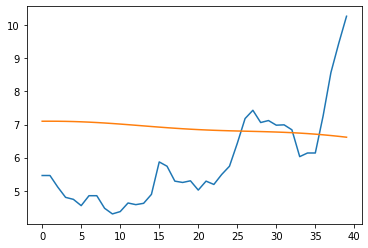

In [231]:
plt.plot(train_data.iloc[:40,:]['y'])
plt.plot(fcst.iloc[:40,:]['yhat'])

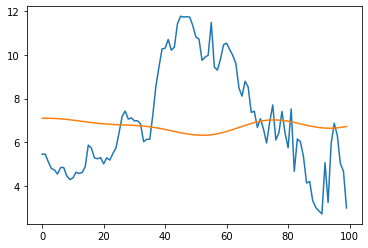

In [232]:
plt.plot(train_data.iloc[:100,:]['y'])
plt.plot(fcst.iloc[:100,:]['yhat'])

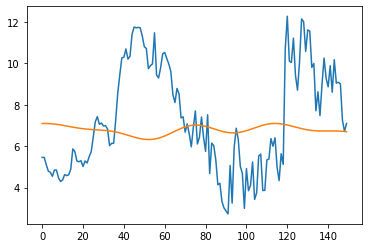

In [233]:
plt.plot(train_data.iloc[:150,:]['y'])
plt.plot(fcst.iloc[:150,:]['yhat'])

C:\Users\USER\anaconda3\envs\local_torch\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\USER\anaconda3\envs\local_torch\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


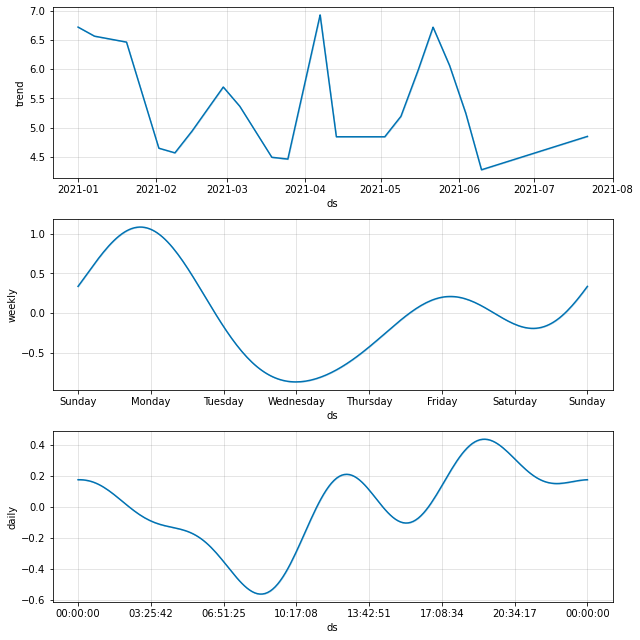

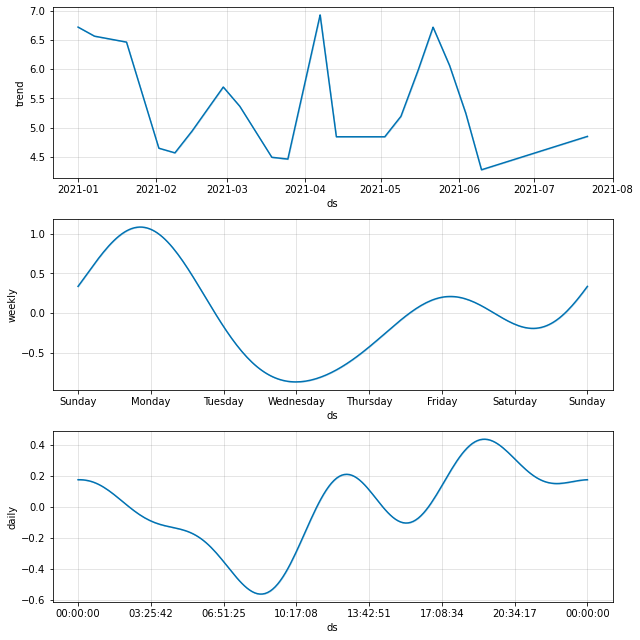

In [216]:
m.plot_components(fcst)

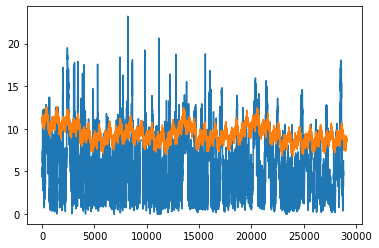

In [214]:
plt.plot(train_data['y'])
plt.plot(fcst['yhat_upper'])

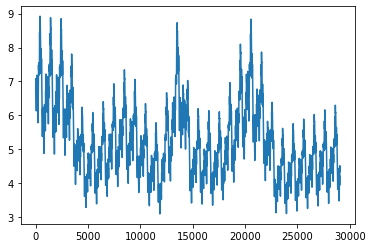

In [178]:
plt.plot(fcst['yhat'])

# acf, pacf

비정상성을 제거하는 모델 ARIMA

- p : AR이 몇번째 까지 과거를 보는지
- d : 차분에 대한 파라미터
- q:  MR이 몇번째 과거까지 보는지

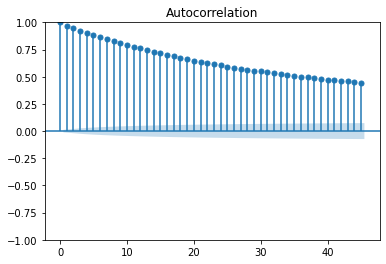

In [43]:
plot_acf(train_data['Wspd'])
plt.show()

C:\Users\USER\anaconda3\envs\local_torch\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


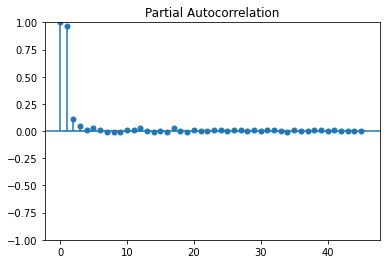

In [44]:
plot_pacf(train_data['Wspd'])
plt.show()